In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install yfinance 
import yfinance as yf



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df= yf.Ticker("^NSEBANK").history(period='3y').reset_index()
df_axis= yf.Ticker("AXISBANK.NS").history(period='3y').reset_index()
df_sbi= yf.Ticker("SBIN.NS").history(period='3y').reset_index()
df_rbl= yf.Ticker("RBLBANK.NS").history(period='3y').reset_index()
df_pnb= yf.Ticker("PNB.NS").history(period='3y').reset_index()
df_kot= yf.Ticker("KOTAKBANK.NS").history(period='3y').reset_index()
df_ind= yf.Ticker("INDUSINDBK.NS").history(period='3y').reset_index()
df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='3y').reset_index()
df_icic= yf.Ticker("ICICIBANK.NS").history(period='3y').reset_index()
df_band= yf.Ticker("BANDHANBNK.NS").history(period='3y').reset_index()
df_hdfc= yf.Ticker("HDFC.NS").history(period='3y').reset_index()
df_fed= yf.Ticker("FEDERALBNK.NS").history(period='3y').reset_index()
df_au= yf.Ticker("AUBANK.NS").history(period='3y').reset_index()

In [3]:
df.head()

Date          Open          High           Low  \
0 2020-12-14 00:00:00+05:30  30734.793094  30845.442198  30623.893992   
1 2020-12-15 00:00:00+05:30  30805.041637  30805.490851  30345.396599   
2 2020-12-16 00:00:00+05:30  30919.989603  30931.889855  30586.743483   
3 2020-12-17 00:00:00+05:30  30790.840494  30944.838700  30643.543382   
4 2020-12-18 00:00:00+05:30  30841.490707  30853.691737  30374.146536   

          Close  Volume  Dividends  Stock Splits  
0  30745.542969  269000        0.0           0.0  
1  30690.693359  279400        0.0           0.0  
2  30698.042969       0        0.0           0.0  
3  30846.691406       0        0.0           0.0  
4  30714.292969       0        0.0           0.0

In [4]:
import plotly.express as px
fig = px.line(df, x='Date', y="Open")
fig.show()

In [5]:
print(df_rbl.Date.max())
print(df_rbl.Date.min())

2023-12-13 00:00:00+05:30
2020-12-14 00:00:00+05:30


Text(0.5, 1.0, 'au')

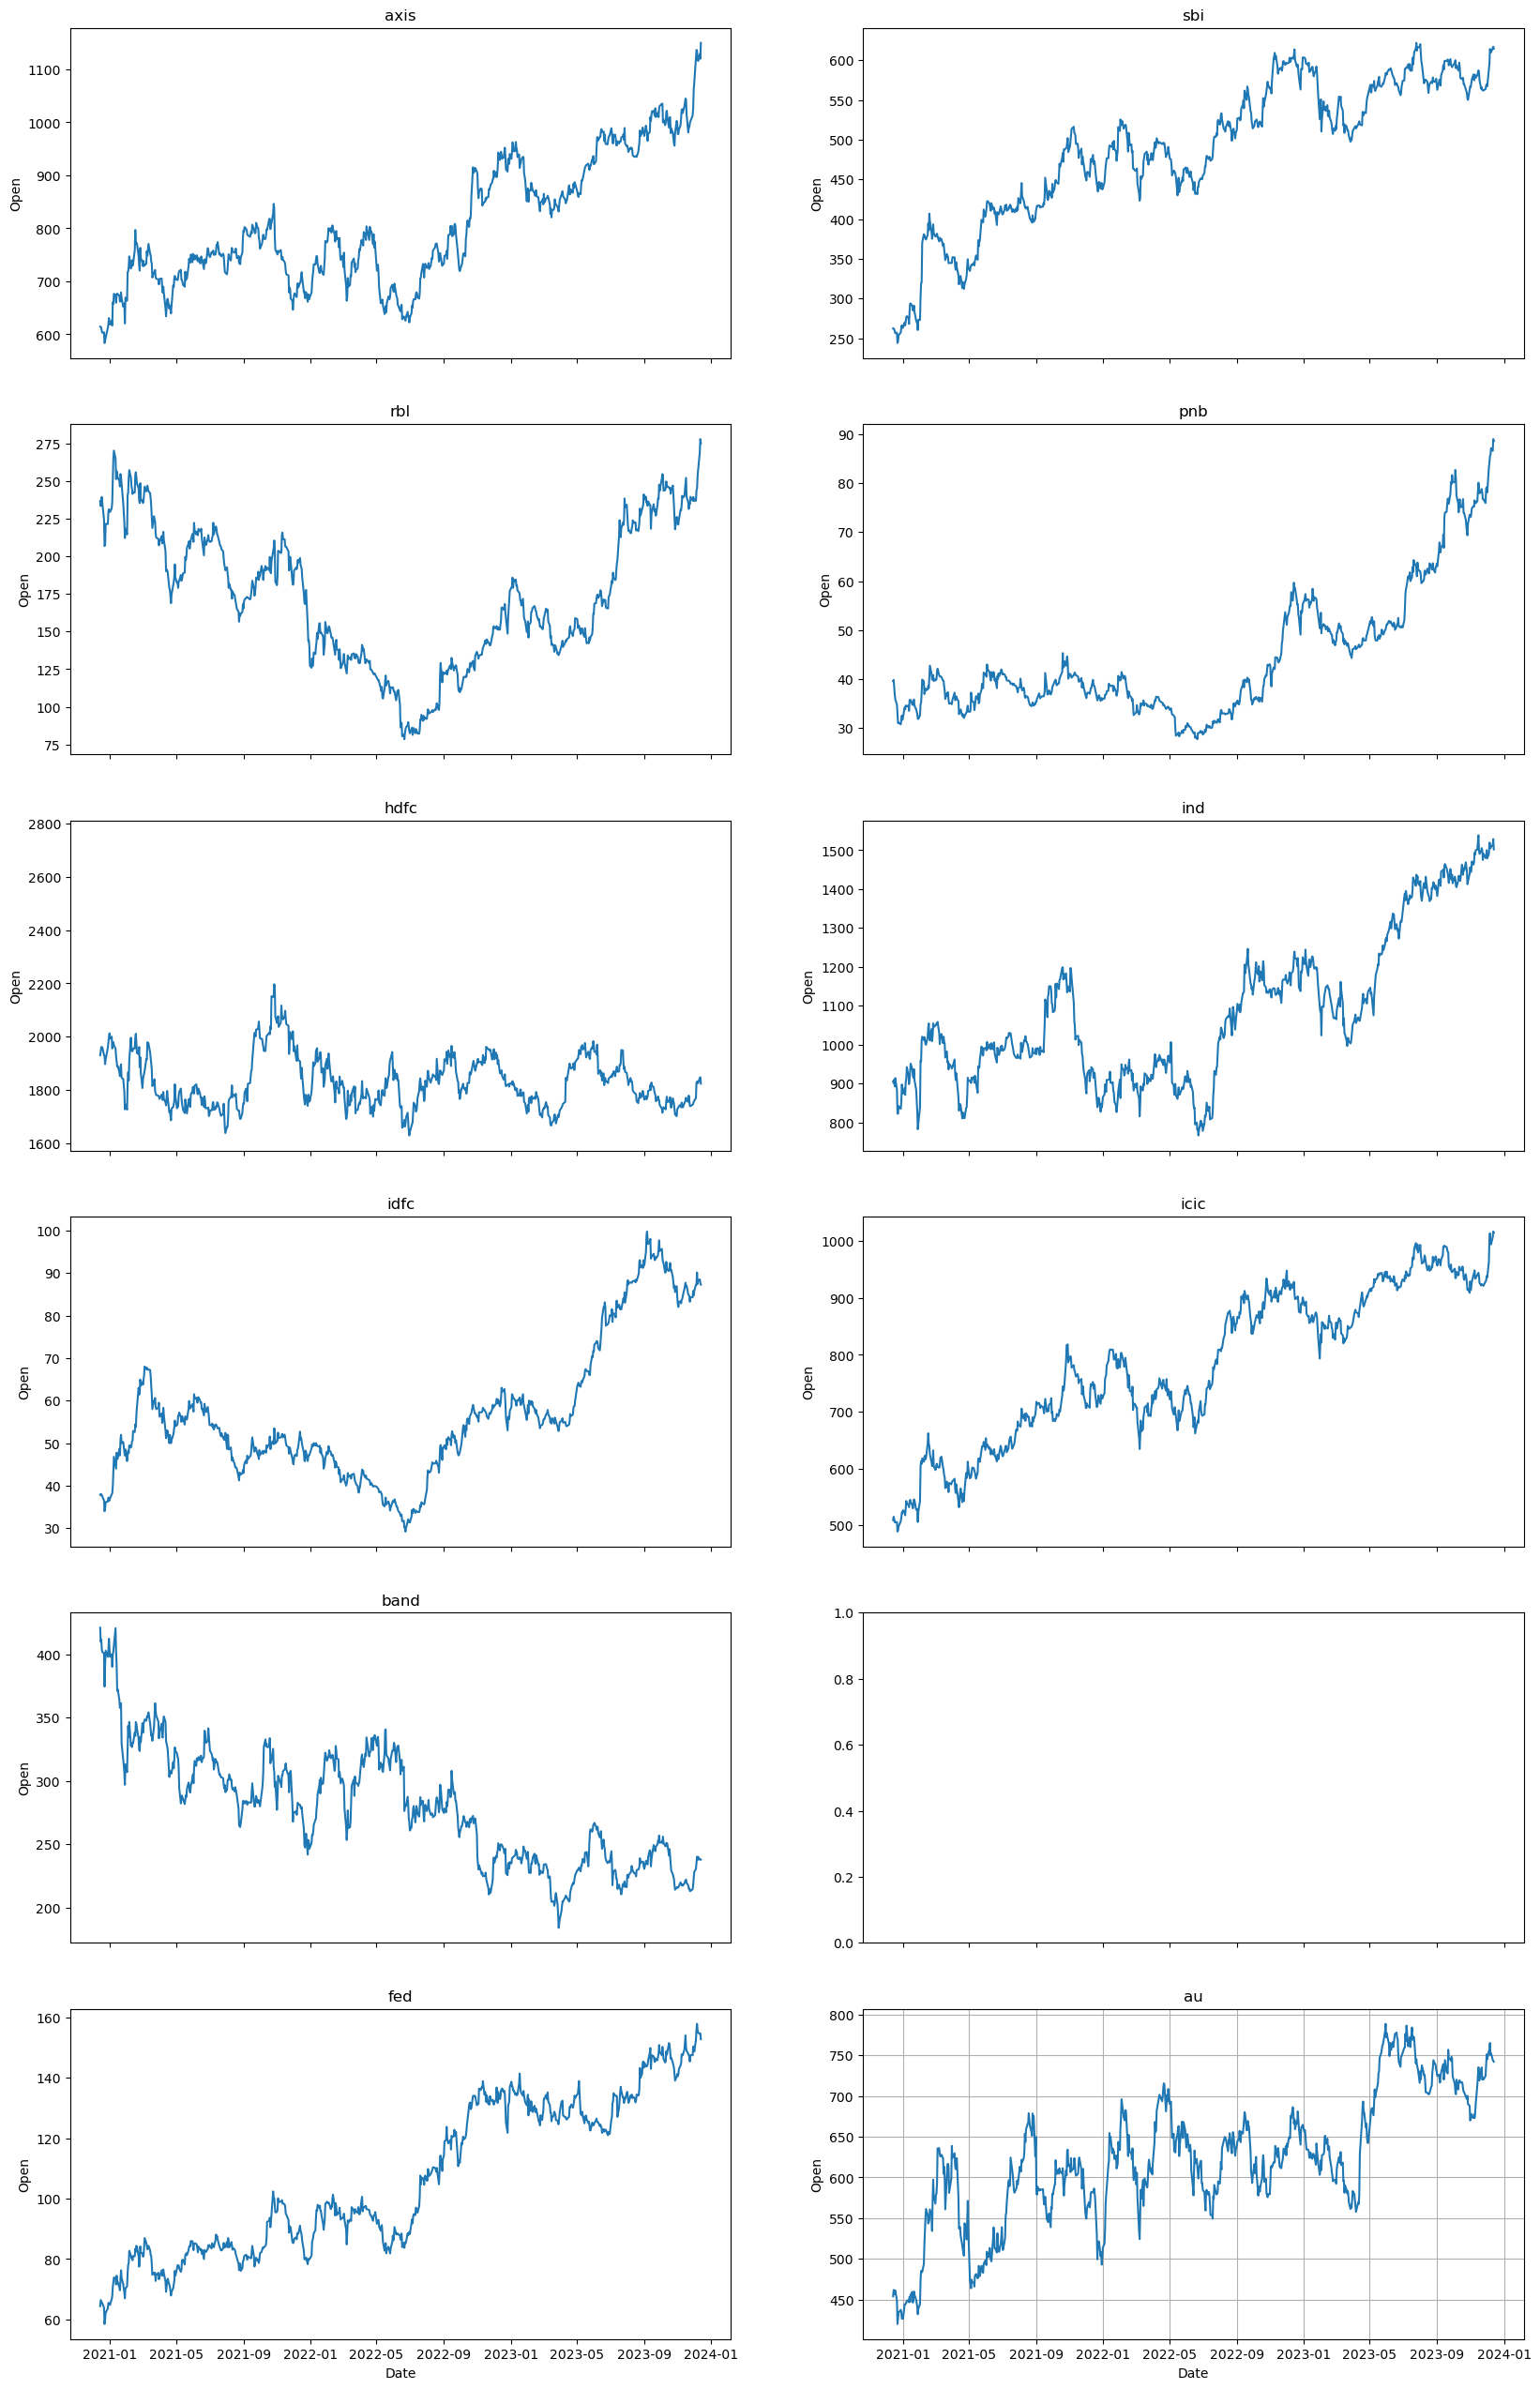

In [6]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(20,32))
plt.grid(True)
sns.lineplot(ax=axes[0, 0], data=df_axis, x='Date', y='Open')
axes[0,0].set_title('axis')
sns.lineplot(ax=axes[0, 1], data=df_sbi, x='Date', y='Open')
axes[0,1].set_title('sbi')
sns.lineplot(ax=axes[1, 0], data=df_rbl, x='Date', y='Open')
axes[1,0].set_title('rbl')
sns.lineplot(ax=axes[1, 1], data=df_pnb, x='Date', y='Open')
axes[1,1].set_title('pnb')
sns.lineplot(ax=axes[2, 0], data=df_kot, x='Date', y='Open')
axes[2,0].set_title('kot')
sns.lineplot(ax=axes[2, 1], data=df_ind, x='Date', y='Open')
axes[2,1].set_title('ind')
sns.lineplot(ax=axes[3, 0], data=df_idfc, x='Date', y='Open')
axes[3,0].set_title('idfc')
sns.lineplot(ax=axes[3, 1], data=df_icic, x='Date', y='Open')
axes[3,1].set_title('icic')
sns.lineplot(ax=axes[4, 0], data=df_band, x='Date', y='Open')
axes[4,0].set_title('band')
sns.lineplot(ax=axes[2, 0], data=df_hdfc, x='Date', y='Open')
axes[2,0].set_title('hdfc')
sns.lineplot(ax=axes[5, 0], data=df_fed, x='Date', y='Open')
axes[5,0].set_title('fed')
sns.lineplot(ax=axes[5,1], data=df_au, x='Date', y='Open')
axes[5,1].set_title('au')

In [7]:
print(df.shape)
date_train=pd.to_datetime(df['Date'])
date_train

(741, 8)


0     2020-12-14 00:00:00+05:30
1     2020-12-15 00:00:00+05:30
2     2020-12-16 00:00:00+05:30
3     2020-12-17 00:00:00+05:30
4     2020-12-18 00:00:00+05:30
                 ...           
736   2023-12-07 00:00:00+05:30
737   2023-12-08 00:00:00+05:30
738   2023-12-11 00:00:00+05:30
739   2023-12-12 00:00:00+05:30
740   2023-12-13 00:00:00+05:30
Name: Date, Length: 741, dtype: datetime64[ns, Asia/Kolkata]

In [8]:
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    date_train=pd.to_datetime(df['Date'])
    df_train=df[['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
    df_train=df_train.astype(float)
    
    df_train_scaled=Scale.fit_transform(df_train)

    X, y =[],[]
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i+future-1:i+future, 0])
        
    return np.array(X), np.array(y), df_train, date_train

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

In [9]:
def Lstm_fallback(X,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(X.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model

In [10]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [11]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

In [12]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [13]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [14]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

Epoch 1/100
10/10 [==============================] - 24s 574ms/step - loss: 0.3813 - val_loss: 0.1237
Epoch 2/100
10/10 [==============================] - 1s 129ms/step - loss: 0.1701 - val_loss: 0.1937
Epoch 3/100
10/10 [==============================] - 2s 152ms/step - loss: 0.1364 - val_loss: 0.0795
Epoch 4/100
10/10 [==============================] - 1s 135ms/step - loss: 0.1141 - val_loss: 0.0811
Epoch 5/100
10/10 [==============================] - 1s 122ms/step - loss: 0.1043 - val_loss: 0.0779
Epoch 6/100
10/10 [==============================] - 1s 131ms/step - loss: 0.0928 - val_loss: 0.0857
Epoch 7/100
10/10 [==============================] - 2s 161ms/step - loss: 0.0909 - val_loss: 0.0817
Epoch 8/100
10/10 [==============================] - 1s 148ms/step - loss: 0.0857 - val_loss: 0.1049
Epoch 9/100
10/10 [==============================] - 2s 156ms/step - loss: 0.0795 - val_loss: 0.0757
Epoch 10/100
10/10 [==============================] - 1s 135ms/step - loss: 0.0833 - val_l

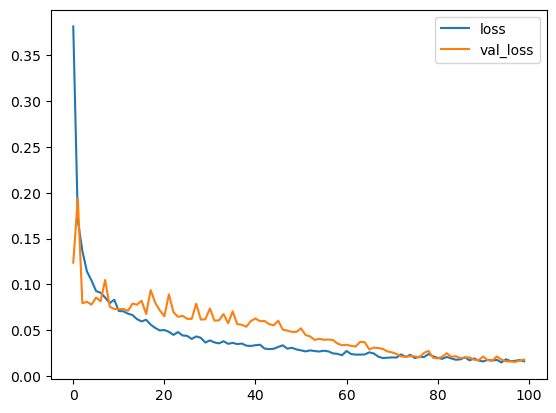

In [15]:
results(df, 30, 1, Scale, 'NSEBANK')

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv('NSE.csv')
df.head()

DATE  OPEN PREDICTED  NSE BANK
0    11          442941         2
1    12          443180         4
2    13          443106         6
3    14          442122         8
4    15          441461        10

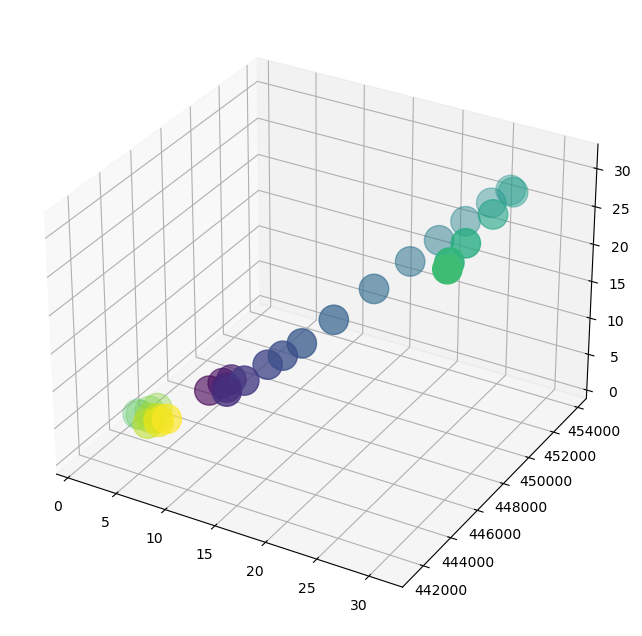

In [18]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['DATE'],
        s = df['OPEN PREDICTED']/999 , c=df['NSE BANK'])


Epoch 1/100
9/9 [==============================] - 14s 318ms/step - loss: 1.9465 - val_loss: 2.8645
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 0.4305 - val_loss: 2.5582
Epoch 3/100
9/9 [==============================] - 0s 41ms/step - loss: 0.2983 - val_loss: 2.6316
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2403 - val_loss: 2.7242
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1979 - val_loss: 2.7000
Epoch 6/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1934 - val_loss: 2.5725
Epoch 7/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1715 - val_loss: 2.4795
Epoch 8/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1625 - val_loss: 2.4024
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1498 - val_loss: 2.3976
Epoch 10/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1432 - val_loss: 2.2939
Epoch 11/100
9/9 

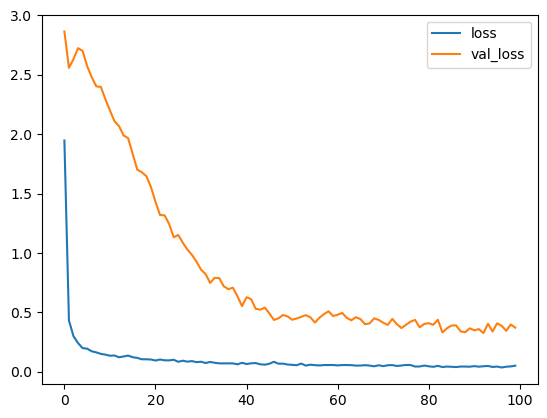

In [19]:
d={'AXIS':df_axis} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('AXIS.csv')
df.head()

DATE  OPEN PREDICTED  AXIS BANK
0    11             917          2
1    12             919          4
2    13             921          6
3    14             921          8
4    15             920         10

In [22]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'AXIS BANK'], dtype='object')

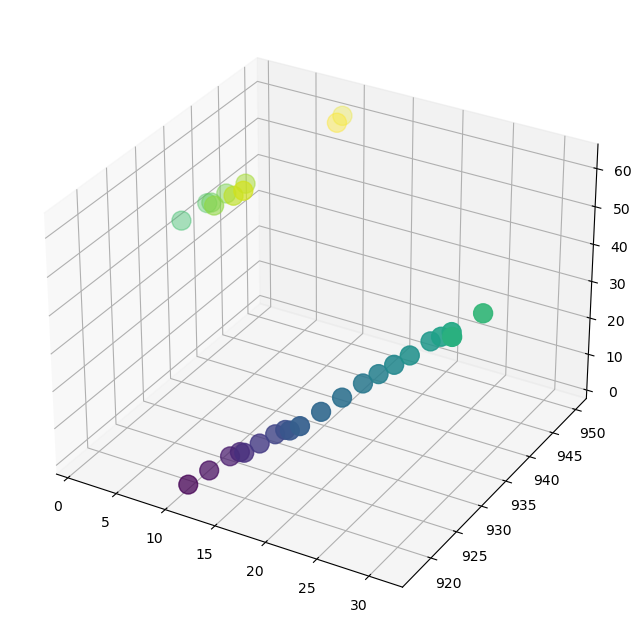

In [23]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['AXIS BANK'],
        s = df['OPEN PREDICTED']/5 , c=df['AXIS BANK'])


Epoch 1/100
9/9 [==============================] - 13s 306ms/step - loss: 1.1121 - val_loss: 1.0132
Epoch 2/100
9/9 [==============================] - 0s 39ms/step - loss: 0.4349 - val_loss: 0.8572
Epoch 3/100
9/9 [==============================] - 0s 37ms/step - loss: 0.3715 - val_loss: 0.9178
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2851 - val_loss: 1.1074
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2677 - val_loss: 1.0892
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2268 - val_loss: 1.0134
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2025 - val_loss: 0.9276
Epoch 8/100
9/9 [==============================] - 0s 45ms/step - loss: 0.1881 - val_loss: 0.8912
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1744 - val_loss: 0.8863
Epoch 10/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1529 - val_loss: 0.8917
Epoch 11/100
9/9 

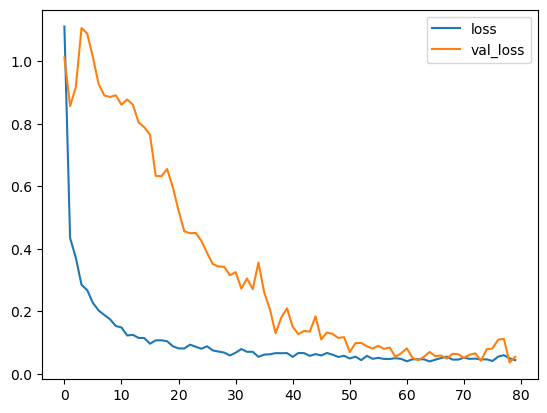

In [24]:
d={'SBI':df_sbi} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.read_csv('SBI.csv')
df.head()

DATE  OPEN PREDICTED  SBI
0    20        559.6400    2
1    21        561.8987    4
2    22        563.8400    6
3    23        567.0000    8
4    24        568.8800   10

In [27]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'SBI'], dtype='object')

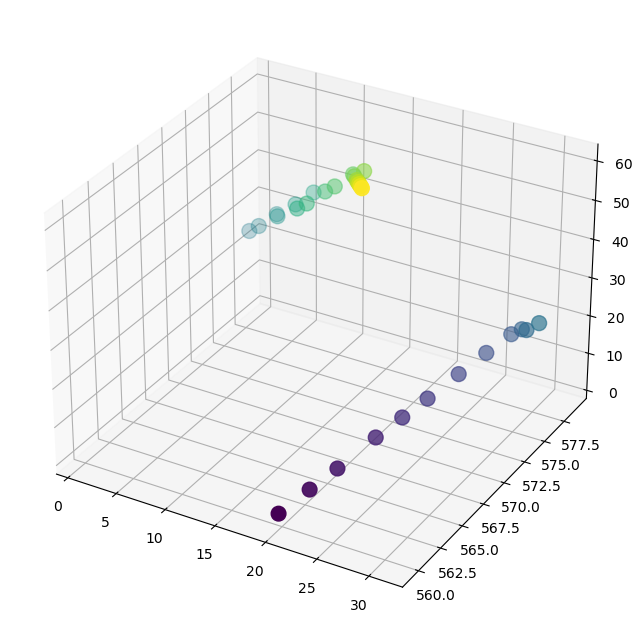

In [28]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['SBI'],
        s = df['OPEN PREDICTED']/5 , c=df['SBI'])


Epoch 1/100
9/9 [==============================] - 13s 292ms/step - loss: 1.1015 - val_loss: 0.7865
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 0.4574 - val_loss: 0.7988
Epoch 3/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3054 - val_loss: 0.8655
Epoch 4/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2540 - val_loss: 0.8611
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2001 - val_loss: 0.8984
Epoch 6/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1540 - val_loss: 0.9314
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1737 - val_loss: 0.9333
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1729 - val_loss: 0.8909
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1692 - val_loss: 0.8608
Epoch 10/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1479 - val_loss: 0.8737
Epoch 11/100
9/9 

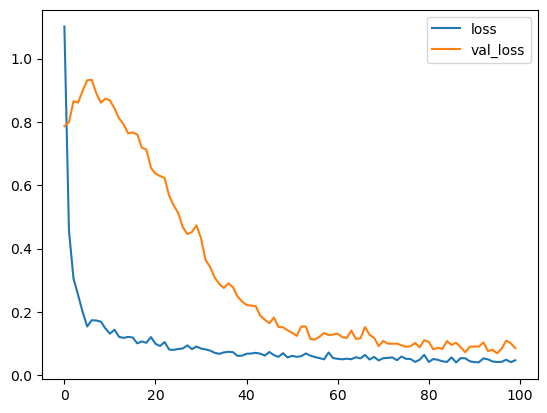

In [29]:
 d={'RBL': df_rbl } 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_csv('RBL.csv')
df.head()

DATE  OPEN PREDICTED  RBL
0    20           228.0    2
1    21           227.0    4
2    22           227.0    6
3    23           227.0    8
4    24           223.0   10

In [32]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'RBL'], dtype='object')

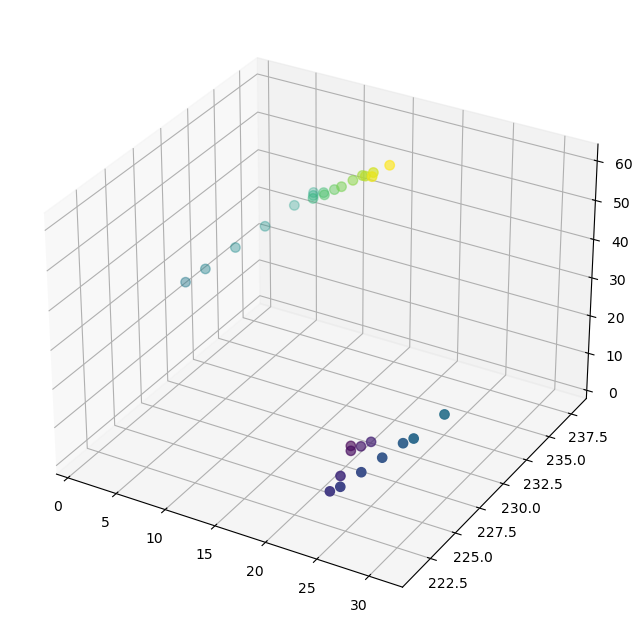

In [33]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['RBL'],
        s = df['OPEN PREDICTED']/5 , c=df['RBL'])


Epoch 1/100
9/9 [==============================] - 13s 295ms/step - loss: 1.0781 - val_loss: 3.0473
Epoch 2/100
9/9 [==============================] - 0s 41ms/step - loss: 0.4745 - val_loss: 3.1574
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 0.3242 - val_loss: 3.2488
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2173 - val_loss: 3.2545
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1825 - val_loss: 3.2289
Epoch 6/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1403 - val_loss: 3.1903
Epoch 7/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1399 - val_loss: 3.1564
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1160 - val_loss: 3.1093
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1150 - val_loss: 3.0534
Epoch 10/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1012 - val_loss: 3.0332
Epoch 11/100
9/9 

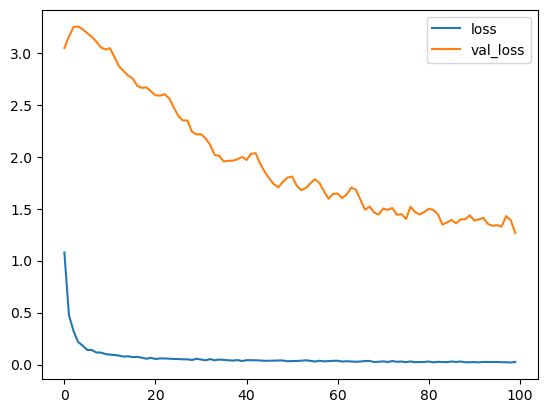

In [34]:
 d={'PNB': df_pnb } 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
df = pd.read_csv('PNB.csv')
df.head()

DATE  OPEN PREDICTED  PNB
0    20              53    2
1    21              53    4
2    22              53    6
3    23              53    8
4    24              53   10

In [37]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'PNB'], dtype='object')

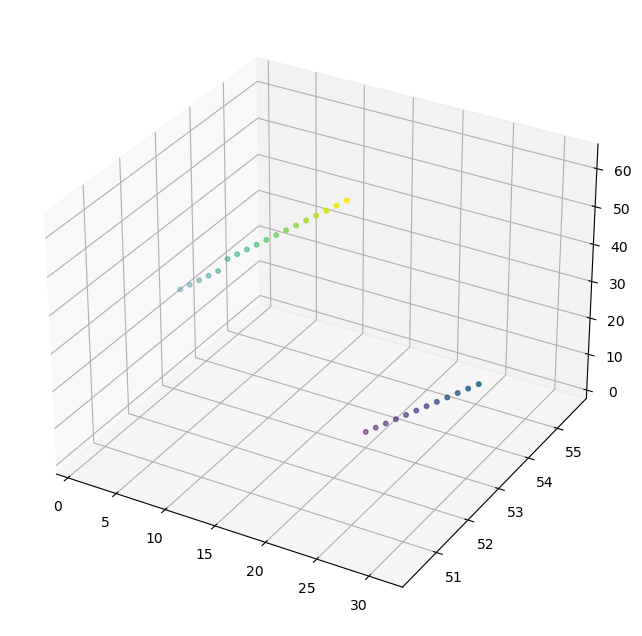

In [38]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['PNB'],
        s = df['OPEN PREDICTED']/5 , c=df['PNB'])


Epoch 1/100
9/9 [==============================] - 14s 291ms/step - loss: 0.9537 - val_loss: 0.4225
Epoch 2/100
9/9 [==============================] - 0s 38ms/step - loss: 0.5648 - val_loss: 0.3909
Epoch 3/100
9/9 [==============================] - 0s 46ms/step - loss: 0.3437 - val_loss: 0.3781
Epoch 4/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3040 - val_loss: 0.3681
Epoch 5/100
9/9 [==============================] - 0s 42ms/step - loss: 0.2708 - val_loss: 0.3578
Epoch 6/100
9/9 [==============================] - 0s 42ms/step - loss: 0.2583 - val_loss: 0.3465
Epoch 7/100
9/9 [==============================] - 0s 36ms/step - loss: 0.2647 - val_loss: 0.3375
Epoch 8/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2289 - val_loss: 0.3256
Epoch 9/100
9/9 [==============================] - 0s 44ms/step - loss: 0.2297 - val_loss: 0.3157
Epoch 10/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1859 - val_loss: 0.3009
Epoch 11/100
9/9 

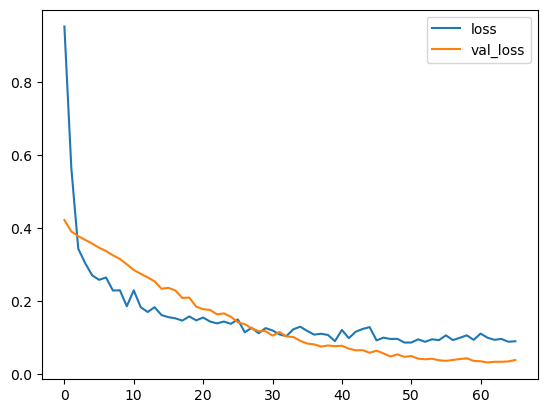

In [39]:
 d={'KOTAK': df_kot} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv('kotak.csv')
df.head()

DATE  OPEN PREDICTED  KOTAK
0    11            1779      2
1    12            1779      4
2    13            1776      6
3    14            1773      8
4    15            1771     10

In [42]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'KOTAK'], dtype='object')

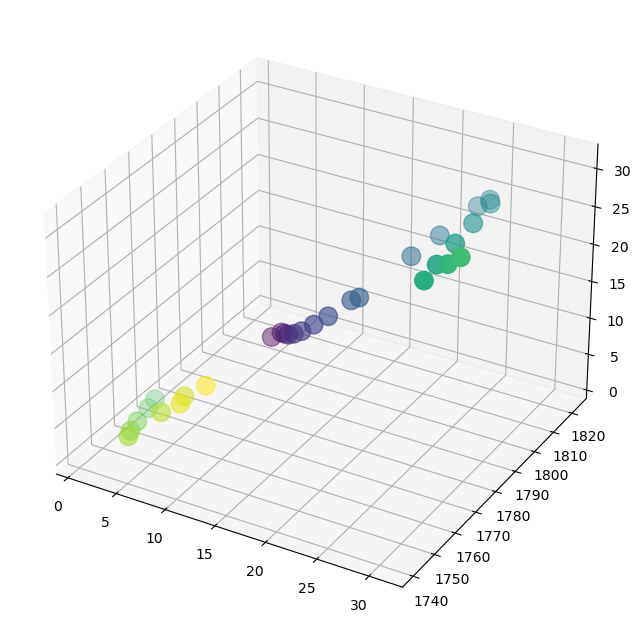

In [43]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['DATE'],
        s = df['OPEN PREDICTED']/10 , c=df['KOTAK'])


Epoch 1/100
9/9 [==============================] - 14s 300ms/step - loss: 1.5806 - val_loss: 3.2374
Epoch 2/100
9/9 [==============================] - 0s 39ms/step - loss: 0.4780 - val_loss: 2.7286
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 0.3460 - val_loss: 2.5009
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.3079 - val_loss: 2.4365
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2579 - val_loss: 2.3927
Epoch 6/100
9/9 [==============================] - 0s 43ms/step - loss: 0.2004 - val_loss: 2.3788
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2254 - val_loss: 2.3727
Epoch 8/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2058 - val_loss: 2.3879
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1959 - val_loss: 2.3524
Epoch 10/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1727 - val_loss: 2.2927
Epoch 11/100
9/9 

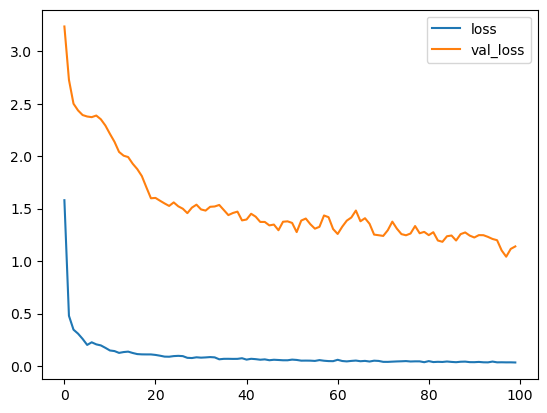

In [44]:
 d={ 'INDUSIND':df_ind} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df = pd.read_csv('IND.csv')
df.head()

DATE  OPEN PREDICTED  IND
0    20          1197.0    2
1    21          1199.0    4
2    22          1201.0    6
3    23          1201.0    8
4    24          1200.0   10

In [47]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'IND'], dtype='object')

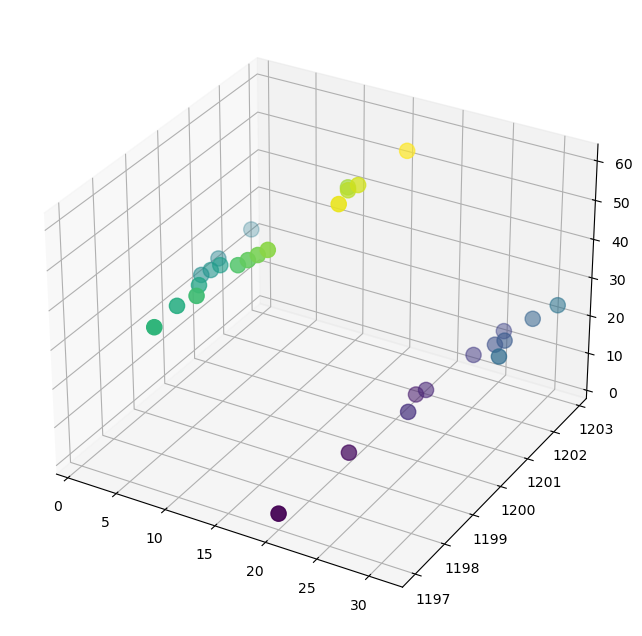

In [48]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['IND'],
        s = df['OPEN PREDICTED']/10 , c=df['IND'])


Epoch 1/100
9/9 [==============================] - 14s 309ms/step - loss: 1.9299 - val_loss: 2.5236
Epoch 2/100
9/9 [==============================] - 0s 46ms/step - loss: 1.1726 - val_loss: 2.7597
Epoch 3/100
9/9 [==============================] - 0s 41ms/step - loss: 0.8011 - val_loss: 2.9623
Epoch 4/100
9/9 [==============================] - 0s 49ms/step - loss: 0.6235 - val_loss: 2.9514
Epoch 5/100
9/9 [==============================] - 0s 49ms/step - loss: 0.4401 - val_loss: 3.0079
Epoch 6/100
9/9 [==============================] - 0s 43ms/step - loss: 0.3337 - val_loss: 3.2593
Epoch 7/100
9/9 [==============================] - 0s 50ms/step - loss: 0.2834 - val_loss: 3.3069
Epoch 8/100
9/9 [==============================] - 0s 48ms/step - loss: 0.2072 - val_loss: 3.1950
Epoch 9/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1856 - val_loss: 3.1857
Epoch 10/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1868 - val_loss: 3.1531
Epoch 11/100
9/9 

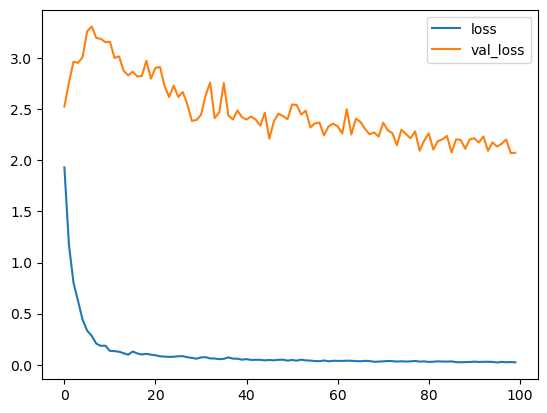

In [49]:
 d={'IDFC': df_idfc} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
df = pd.read_csv('IDFC.csv')
df.head()

DATE  OPEN PREDICTED  IDFC
0    20           65.00     2
1    21           64.00     4
2    22           64.00     6
3    23           64.00     8
4    24           64.64    10

In [52]:
df.columns

Index(['DATE', 'OPEN PREDICTED', 'IDFC'], dtype='object')

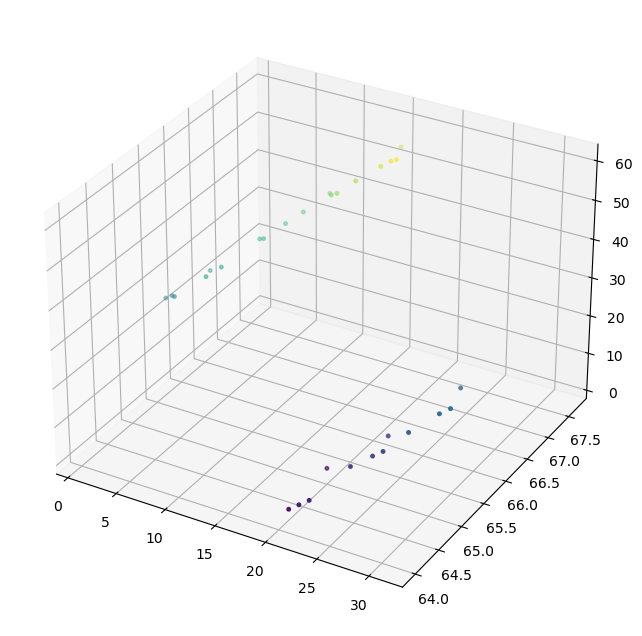

In [53]:

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(df['DATE'],df['OPEN PREDICTED'],df['IDFC'],
        s = df['OPEN PREDICTED']/10 , c=df['IDFC'])


Epoch 1/100
9/9 [==============================] - 13s 294ms/step - loss: 1.1807 - val_loss: 1.1232
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 0.5300 - val_loss: 1.1286
Epoch 3/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2900 - val_loss: 1.1843
Epoch 4/100
9/9 [==============================] - 0s 31ms/step - loss: 0.1999 - val_loss: 1.1715
Epoch 5/100
9/9 [==============================] - 0s 34ms/step - loss: 0.2042 - val_loss: 1.1511
Epoch 6/100
9/9 [==============================] - 0s 33ms/step - loss: 0.1623 - val_loss: 1.1302
Epoch 7/100
9/9 [==============================] - 0s 49ms/step - loss: 0.1639 - val_loss: 1.1072
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1441 - val_loss: 1.0454
Epoch 9/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1291 - val_loss: 1.0238
Epoch 10/100
9/9 [==============================] - 0s 47ms/step - loss: 0.1148 - val_loss: 1.0048
Epoch 11/100
9/9 

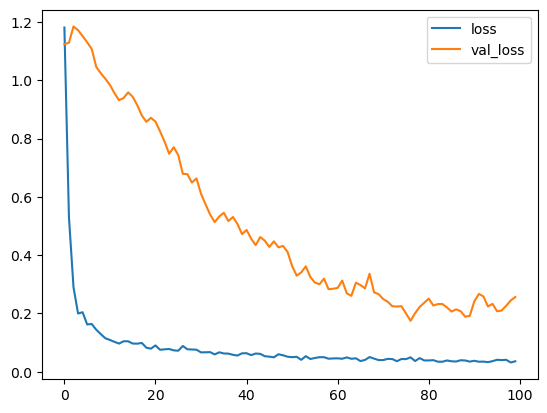

In [54]:
 d={'ICIC': df_icic} 
for x in d.keys():
    results1(d[x], 30, 1, Scale, x)